Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [18]:
data=pd.read_csv("bank-full.csv",sep=';')
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.shape

(45211, 17)

In [19]:
data.duplicated().value_counts()

False    45211
dtype: int64

# dividing data into input and output

In [24]:
y=data.iloc[:,[-1]]
y.head()

,y
0,no
1,no
2,no
3,no
4,no


,y
0,no
1,no


C:\Users\Unique Web System\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

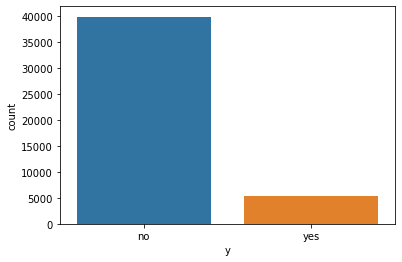

In [26]:
sns.countplot(data["y"])

In [25]:
x=data.iloc[:,0:15]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x1 = x.apply(le.fit_transform)
x1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0


In [36]:
classifier = LogisticRegression()
classifier.fit(x1,y)

C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# for predictions

In [37]:
y_pred = classifier.predict_proba(x1)
y_pred

array([[0.94782322, 0.05217678],
       [0.95349878, 0.04650122],
       [0.9426147 , 0.0573853 ],
       ...,
       [0.71291089, 0.28708911],
       [0.95662603, 0.04337397],
       [0.48350627, 0.51649373]])

In [38]:
y_pred = classifier.predict(x1)

In [39]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)